### 1.  What are the 10 most played tracks and artists? 🎶

In [32]:
'''
I used 2 approaches to answer this question- top 20 artists by appearance count 
and top 20 artists by minutes played
'''
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter

# load data
music_tracks_df = pd.read_csv('../Cleaned_Data/Music_Streaming_History.csv')
podcast_episodes_df = pd.read_csv('../Cleaned_Data/Podcast_Streaming_History.csv')


# set font to Microsoft YaHei to show Chinese characters
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

#### Find top 10 artists by appearances

In [33]:
top_artists = music_tracks_df['artist_name'].value_counts().head(10)
print(top_artists)

artist_name
Hebe Tien      14441
S.H.E          12149
JJ Lin         11464
Yoga Lin        8739
Leehom Wang     8312
許嵩              6570
G.E.M.          5692
Jay Chou        5590
sodagreen       5478
OneRepublic     5259
Name: count, dtype: int64


#### Find top 10 artists by hours played

In [34]:
# group by artist_name and sum the minutes played
artist_played_hours=(
    music_tracks_df.groupby('artist_name')['minutes_played']
    .sum()
    .sort_values(ascending=False)
    /60 #convert to hours
)

# find top 10 artists
top_10_artists = artist_played_hours.round(0).head(10)
print(top_10_artists)


artist_name
Hebe Tien      612.0
JJ Lin         603.0
S.H.E          455.0
Yoga Lin       388.0
Leehom Wang    318.0
許嵩             269.0
G.E.M.         249.0
Jay Chou       235.0
路嘉欣            197.0
Joker Xue      194.0
Name: minutes_played, dtype: float64


#### Visualize top 10 Artists

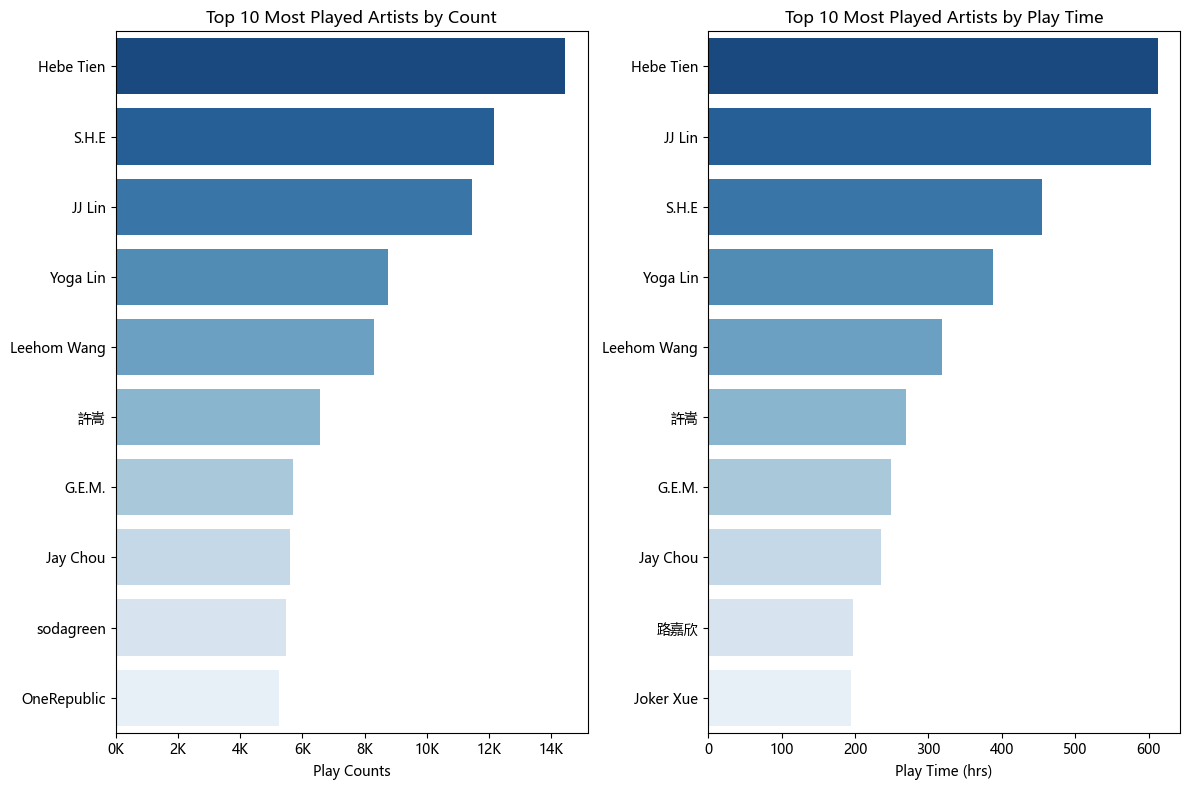

In [36]:
fig, ax = plt.subplots(1,2,figsize=(12,8))

#plot first chart
sns.barplot(
    x=top_artists.values,
    y=top_artists.index,
    ax=ax[0],
    palette=sns.color_palette('Blues_r',len(top_artists)),
    hue=top_artists.index # #assign y variable to hue
)

ax[0].set_title('Top 10 Most Played Artists by Count')
ax[0].set_ylabel('')
ax[0].set_xlabel('Play Counts')
ax[0].xaxis.set_major_formatter(FuncFormatter(lambda x,_: f'{int(x/1000)}K'))

#plot second chart
sns.barplot(
    x=top_10_artists.values,
    y=top_10_artists.index,
    ax=ax[1],
    palette=sns.color_palette('Blues_r',len(top_10_artists)),
    hue=top_10_artists.index
)

ax[1].set_title('Top 10 Most Played Artists by Play Time')
ax[1].set_ylabel('')
ax[1].set_xlabel('Play Time (hrs)')

plt.tight_layout()
plt.show()

#### Visualize top 10 artists by counts over time

<Axes: xlabel='year', ylabel='minutes_played'>

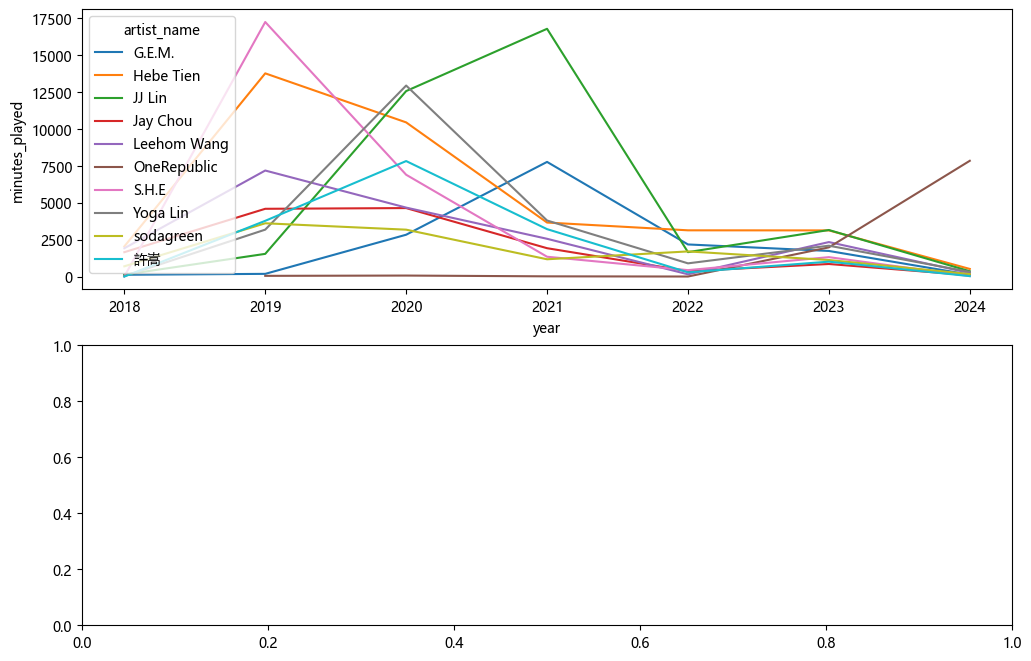

In [38]:
top_artists = music_tracks_df['artist_name'].value_counts().head(10).index.tolist()

# calculate total minutes played for all artists in each year
# group by artist_name and years, summing minutes played
grouped_data =(
    music_tracks_df.groupby(['artist_name','year'])['minutes_played']
    .sum()
    .reset_index()
)

# only include top 10 artists by count in the grouped data
filtered_data=grouped_data[grouped_data['artist_name'].isin(top_artists)]

# create line chart
fig, ax = plt.subplots(2,1,figsize=(12,8))
sns.lineplot(
    data=filtered_data,
    x='year',
    y='minutes_played',
    hue='artist_name',
    palette='tab10',
    ax=ax[0]
)